## Model 2 (FE Non HT)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Pemodelan

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SKRIPSI-2023/Code Fix/Dataset/dataROS.csv')
data.head()

,Unnamed: 0,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,HasilPemeriksaanBackground,JumlahPinjaman,SukuBunga,HistoryKegagalan,JumlahHistoriPeminjaman,Konfirmasi%Pendapatan,StatusPinjaman
0,0,-0.714286,-1.049351,3,0.2,2.0,2,-0.833333,-0.110769,1,2.0,0.104167,0.0
1,1,-0.142857,-1.049351,1,-0.6,4.0,3,-0.333333,0.225425,1,3.0,0.572917,1.0
2,2,-0.428571,0.402597,4,0.0,4.0,3,2.944444,0.684049,1,2.0,0.534351,1.0
3,3,-0.285714,0.114286,4,0.8,4.0,3,2.944444,0.497490,2,4.0,0.643382,1.0
4,4,-0.714286,-1.041558,3,-0.4,6.0,1,-0.666667,-0.888097,1,2.0,0.252525,1.0


In [ ]:
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Umur,Pendapatan,KepemilikanRumah,LamaKerja,TujuanPeminjaman,HasilPemeriksaanBackground,JumlahPinjaman,SukuBunga,HistoryKegagalan,JumlahHistoriPeminjaman,Konfirmasi%Pendapatan,StatusPinjaman
0,-0.714286,-1.049351,3,0.2,2.0,2,-0.833333,-0.110769,1,2.0,0.104167,0.0
1,-0.142857,-1.049351,1,-0.6,4.0,3,-0.333333,0.225425,1,3.0,0.572917,1.0
2,-0.428571,0.402597,4,0.0,4.0,3,2.944444,0.684049,1,2.0,0.534351,1.0
3,-0.285714,0.114286,4,0.8,4.0,3,2.944444,0.497490,2,4.0,0.643382,1.0
4,-0.714286,-1.041558,3,-0.4,6.0,1,-0.666667,-0.888097,1,2.0,0.252525,1.0


In [ ]:
data['StatusPinjaman'].value_counts()

0.0    25429
1.0    25429
Name: StatusPinjaman, dtype: int64

In [ ]:
data.shape

(50858, 12)

In [ ]:
x = data.drop(columns='StatusPinjaman')
y = data['StatusPinjaman']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,train_size=0.7, stratify=y, random_state=42)

In [ ]:
x_train.shape,x_test.shape

((35600, 11), (15258, 11))

In [ ]:
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# criterion= ['gini', 'entropy', 'log_loss']
# max_features = ['None', 'sqrt', 'log2']
# max_depth = [int(x) for x in np.linspace(5, 55, num = 11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10, 20]
# min_samples_leaf = [1, 2, 4, 8, 10]

In [ ]:
# param_random = {
#     'n_estimators': n_estimators,
#     'criterion': criterion,
#     'max_depth': max_depth,
#     'max_features': max_features,
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf
#     }

# print(param_random)

In [ ]:
model_random = RandomForestClassifier()

In [ ]:
# RS_model_random = RandomizedSearchCV(estimator = model_random, param_distributions = param_random, scoring = 'accuracy', n_jobs=-1, verbose=10)

In [ ]:
model_random.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
mdi_values = model_random.feature_importances_
feature_names = data.columns

# Tampilkan MDI untuk setiap fitur
for feature, mdi_value in zip(feature_names, mdi_values):
    print(f"Fitur {feature}: {mdi_value}")

Fitur Umur: 0.04517711482916359
Fitur Pendapatan: 0.16710047431573
Fitur KepemilikanRumah: 0.06599267580301078
Fitur LamaKerja: 0.05518984410623686
Fitur TujuanPeminjaman: 0.061577669835772786
Fitur HasilPemeriksaanBackground: 0.12679055501340794
Fitur JumlahPinjaman: 0.07408434156593006
Fitur SukuBunga: 0.12608326963354305
Fitur HistoryKegagalan: 0.013692044021320068
Fitur JumlahHistoriPeminjaman: 0.03622031427463481
Fitur Konfirmasi%Pendapatan: 0.22809169660125006


In [ ]:
threshold = np.mean(mdi_values)
print('Nilai Threshold:', threshold)

Nilai Threshold: 0.09090909090909091


In [ ]:
feature_importance = model_random.feature_importances_

feature_names = data.columns

sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

for feature_name, importance in zip(sorted_feature_names, sorted_feature_importance):
    print(f"Fitur {feature_name}: {importance}")

Fitur Konfirmasi%Pendapatan: 0.22809169660125006
Fitur Pendapatan: 0.16710047431573
Fitur HasilPemeriksaanBackground: 0.12679055501340794
Fitur SukuBunga: 0.12608326963354305
Fitur JumlahPinjaman: 0.07408434156593006
Fitur KepemilikanRumah: 0.06599267580301078
Fitur TujuanPeminjaman: 0.061577669835772786
Fitur LamaKerja: 0.05518984410623686
Fitur Umur: 0.04517711482916359
Fitur JumlahHistoriPeminjaman: 0.03622031427463481
Fitur HistoryKegagalan: 0.013692044021320068


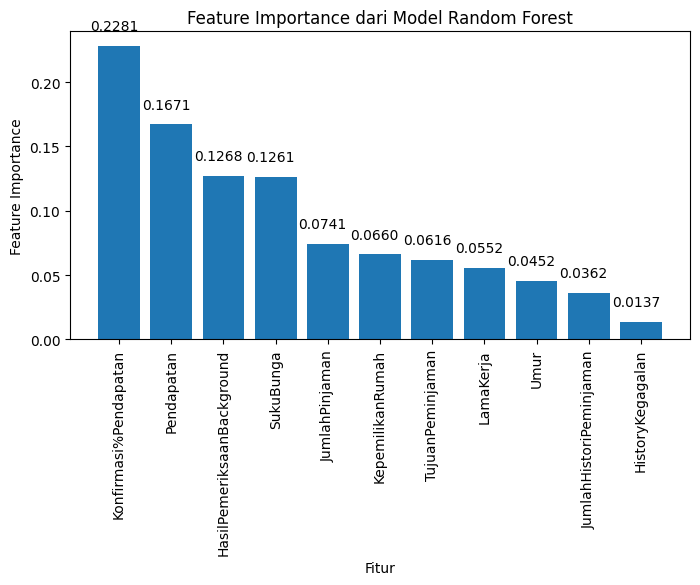

In [ ]:
plt.figure(figsize=(8, 4))
bars = plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel('Fitur')
plt.ylabel('Feature Importance')
plt.title('Feature Importance dari Model Random Forest')

# Menambahkan nilai numerik di atas setiap bar
for bar, importance in zip(bars, sorted_feature_importance):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{importance:.4f}', ha='center', va='bottom')

plt.show()

In [ ]:
mean_importance = np.mean(feature_importance)
std_importance = np.std(feature_importance)

# Misalnya, menggunakan nilai rata-rata + satu deviasi standar sebagai threshold
threshold = mean_importance + std_importance

print(f"Threshold: {threshold}")

Threshold: 0.15213426514892303


In [ ]:
# print('Best parameters found: ', RS_model_random.best_params_)
# print('Best accuracy found: ', RS_model_random.best_score_)

In [ ]:
# best_model = RS_model_random.best_estimator_
# test_accuracy = best_model.score(x_test, y_test)
# print('Test accuracy: ', test_accuracy)

### EVALUASI

In [ ]:
train_predict = model_random.predict(x_train)
test_predict = model_random.predict(x_test)

In [ ]:
train_acc = accuracy_score(y_train, train_predict)
test_acc = accuracy_score(y_test, test_predict)

print(f"Akurasi pada data training: {train_acc:}")
print(f"Akurasi pada data testing: {test_acc:}")

Akurasi pada data training: 1.0
Akurasi pada data testing: 0.9781098440162538


In [ ]:
y_pred = model_random.predict_proba(x_test)
y_pred_train = model_random.predict_proba(x_train)

In [ ]:
y_pred = y_pred[:, 1]
y_pred_train = y_pred_train[:, 1]

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.99


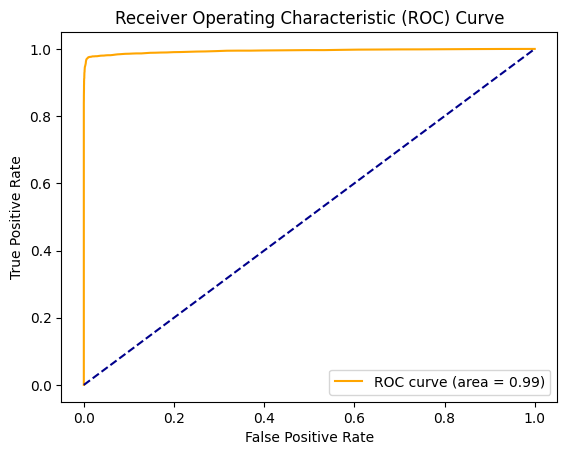

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [ ]:
y_pred1 = (y_pred > 0.5)*1
y_pred1

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_train1 = (y_pred_train > 0.5)*1
y_pred_train1

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy)

0.9781098440162538


tambahin Class Report Data Training

In [ ]:
class_report_train = classification_report(y_train, y_pred_train1)
print('Classification Report:\n', class_report_train)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17800
         1.0       1.00      1.00      1.00     17800

    accuracy                           1.00     35600
   macro avg       1.00      1.00      1.00     35600
weighted avg       1.00      1.00      1.00     35600



In [ ]:
class_report = classification_report(y_test, y_pred1)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      7629
         1.0       0.98      0.98      0.98      7629

    accuracy                           0.98     15258
   macro avg       0.98      0.98      0.98     15258
weighted avg       0.98      0.98      0.98     15258



In [ ]:
cmd = confusion_matrix(y_test, y_pred1)
cmd_train = confusion_matrix(y_train, y_pred_train1)

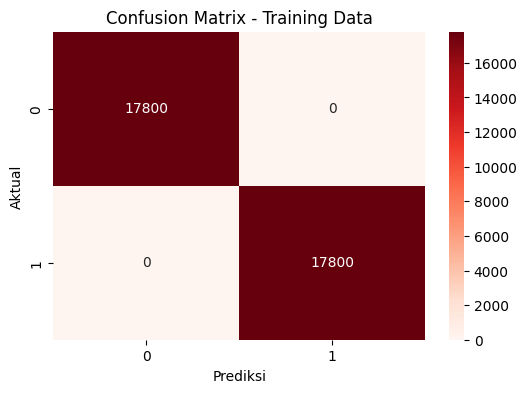

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cmd_train, annot=True, fmt ='d', cmap='Reds')
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

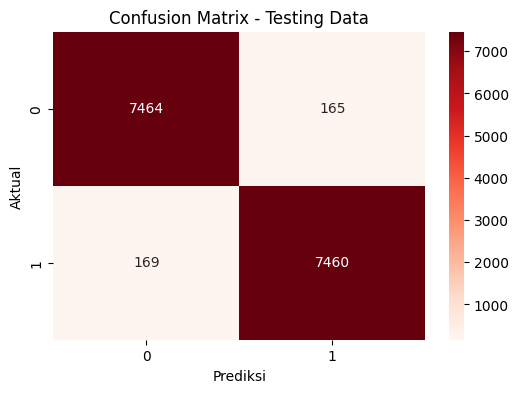

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cmd, annot=True, fmt ='d', cmap='Reds')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
# import pickle

# with open('best_model.pkl', 'wb') as f:
#   pickle.dump(model_random, f)